#### From 'A Guide to Time Series Visualization w/ Python 3'
https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
#python.version()

In [3]:
data = sm.datasets.co2.load_pandas()
print(data)

<class 'statsmodels.datasets.utils.Dataset'>


In [4]:
co2 = data.data

##### Print header - first 5 lines

In [5]:
print(co2.head(5))

              co2
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4


Indexing Data

In [6]:
co2.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

The dtype=datetime[ns] field confirms that our index is made of date stamp objects, while length=2284 and freq='W-SAT' tells us that we have 2,284 weekly date stamps starting on Saturdays.

Use monthly data

In [7]:
y = co2['co2'].resample('MS').mean()

In [8]:
y.head(25)

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
1958-08-01    314.950000
1958-09-01    313.500000
1958-10-01           NaN
1958-11-01    313.425000
1958-12-01    314.700000
1959-01-01    315.500000
1959-02-01    316.700000
1959-03-01    316.733333
1959-04-01    317.675000
1959-05-01    318.325000
1959-06-01    318.025000
1959-07-01    316.525000
1959-08-01    314.900000
1959-09-01    313.825000
1959-10-01    313.400000
1959-11-01    314.875000
1959-12-01    315.525000
1960-01-01    316.380000
1960-02-01    316.975000
1960-03-01    317.575000
Freq: MS, Name: co2, dtype: float64

An interesting feature of pandas is its ability to handle date stamp indices, which allow us to quickly slice our data. For example, we can slice our dataset to only retrieve data points that come after the year 1990:

In [9]:
y['1990':'1992']

1990-01-01    353.650
1990-02-01    354.650
1990-03-01    355.480
1990-04-01    356.175
1990-05-01    357.075
1990-06-01    356.080
1990-07-01    354.675
1990-08-01    352.900
1990-09-01    350.940
1990-10-01    351.225
1990-11-01    352.700
1990-12-01    354.140
1991-01-01    354.675
1991-02-01    355.650
1991-03-01    357.200
1991-04-01    358.600
1991-05-01    359.250
1991-06-01    358.180
1991-07-01    356.050
1991-08-01    353.860
1991-09-01    352.125
1991-10-01    352.250
1991-11-01    353.740
1991-12-01    355.025
1992-01-01    355.900
1992-02-01    356.680
1992-03-01    357.900
1992-04-01    359.075
1992-05-01    359.540
1992-06-01    359.125
1992-07-01    357.000
1992-08-01    354.860
1992-09-01    353.025
1992-10-01    353.420
1992-11-01    354.200
1992-12-01    355.350
Freq: MS, Name: co2, dtype: float64

In [10]:
y['1995-10-01':'1996-10-01']

1995-10-01    357.850
1995-11-01    359.475
1995-12-01    360.700
1996-01-01    362.025
1996-02-01    363.175
1996-03-01    364.060
1996-04-01    364.700
1996-05-01    365.325
1996-06-01    364.880
1996-07-01    363.475
1996-08-01    361.320
1996-09-01    359.400
1996-10-01    359.625
Freq: MS, Name: co2, dtype: float64

Handling Null Values

In [11]:
y.isnull().sum()  ## checks / counts number of null values in dataset

5

In [12]:
## pandas.fillna() command - fills missing values w/ rolling mean [closest non-null value is also option]
y = y.fillna(y.bfill())

In [13]:
y.isnull().sum()

0

#### Visualizing Time-Series Data

- seasonality: does the data display a clear periodic pattern?
- trend: does the data follow a consistent upwards or downward slope?
- noise: are there any outlier points or missing values that are not consistent with the rest of the data?

We can use the pandas wrapper around the matplotlib API to display a plot of our dataset:

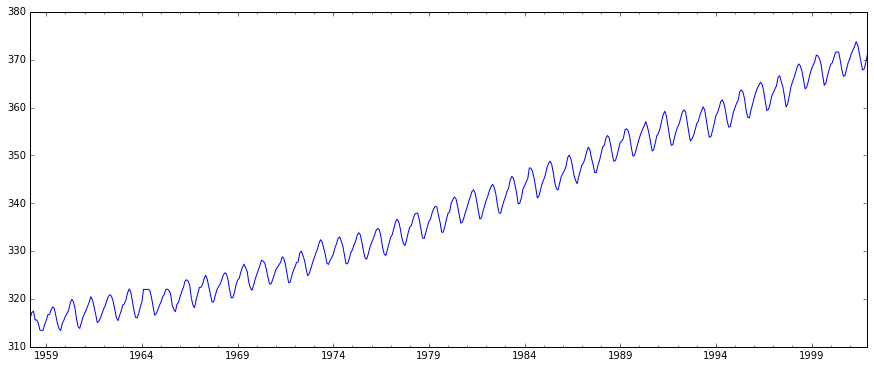

In [14]:
y.plot(figsize=(15, 6))
plt.show()

Time series decomposition allows us to decompose our time series into three distinct components: trend, seasonality, and noise

/opt/conda/lib/python3.5/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


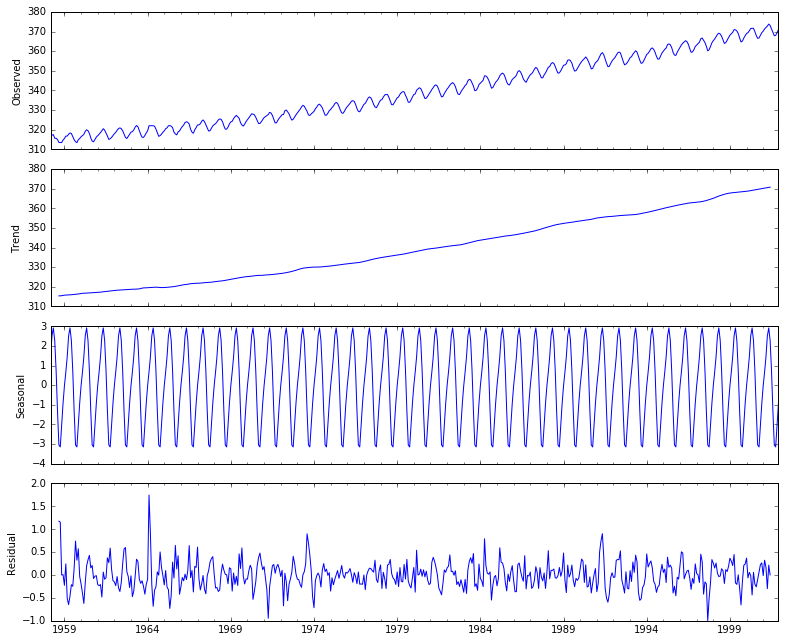

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [16]:
data.data.resample? ## ? check out the usage of this #

SyntaxError: invalid syntax (<ipython-input-16-00ca6de07d35>, line 1)